In [1]:
import sys
sys.path.insert(0, '../src')
import pandas as pd
import numpy as np
import roboscientist.equation.equation as rs_equation
from experiments import run_experiment

import roboscientist.equation.operators as rs_operators
from scipy.special import lambertw


import matplotlib.pyplot as plt

In [2]:
Data=pd.read_pickle('3deffects_with_2MoS_and_SS_dstances_data_for_simbolic.pkl')
Data= pd.DataFrame(Data)

In [3]:
Data

,distance,formE
_id,,
6141cf133ac25c70a5c6c837,"[6.81456020426053, 8.15283752152114, 11.051577...",4.142557
6141cf143ac25c70a5c6c839,"[6.81456020426053, 9.849015303537833, 6.348024...",4.147500
6141cf153ac25c70a5c6c83b,"[12.964839084259287, 13.002467129365924, 11.48...",4.148774
6141cf173ac25c70a5c6c83d,"[3.9879679011360962, 8.152837521521139, 8.4407...",4.116958
6141cf193ac25c70a5c6c83f,"[2.42664862373522, 12.958557120778785, 14.2529...",3.485450
...,...,...
614848553ac25c70a5c6cdfb,"[2.392858899898897, 12.983666738078627, 12.761...",3.490255
614853c33ac25c70a5c6cdfd,"[10.384248457543363, 10.392086694030334, 4.465...",4.165027
6148f3f63ac25c70a5c6cdff,"[12.958557120778785, 14.803393990478009, 13.90...",4.151911


In [16]:
Data=pd.read_pickle('./Symbolic_data_distance_dz_3def.pkl')
Data= pd.DataFrame(Data)
Data.Index

,distance,formE
_id,,
6141cf133ac25c70a5c6c837,"[6.81456020426053, 8.15283752152114, 11.051577...",4.142557
6141cf143ac25c70a5c6c839,"[6.81456020426053, 9.849015303537833, 6.348024...",4.147500
6141cf153ac25c70a5c6c83b,"[12.964839084259287, 13.002467129365924, 11.48...",4.148774
6141cf173ac25c70a5c6c83d,"[3.9879679011360962, 8.152837521521139, 8.4407...",4.116958
6141cf193ac25c70a5c6c83f,"[2.42664862373522, 12.958557120778785, 14.2529...",3.485450
...,...,...
614848553ac25c70a5c6cdfb,"[2.392858899898897, 12.983666738078627, 12.761...",3.490255
614853c33ac25c70a5c6cdfd,"[10.384248457543363, 10.392086694030334, 4.465...",4.165027
6148f3f63ac25c70a5c6cdff,"[12.958557120778785, 14.803393990478009, 13.90...",4.151911


In [10]:
Data_pred=pd.read_pickle('pred_data_and_dft.pkl')
Data_pred= pd.DataFrame(Data_pred)
Data_pred

MEGNet-Sparse-EOS                      \
                         formation_energy_per_site      lumo      homo   
_id                                                                      
6141cf0efbfd4bd9ab2c2f7e                  2.638975  0.444862 -0.677315   
6141cf0f51c1cbd9654b8870                  2.651181  0.388985 -0.703089   
6141cf0fe689ecc4c43cdd4b                  0.292739  1.120906 -0.693750   
6141cf10b842c2e72e2f2d44                  0.305600  1.123136 -0.692421   
6141cf1051c1cbd9654b8872                  2.663806  0.446301 -0.671909   
...                                            ...       ...       ...   
6148f3f63ac25c70a5c6cdff                  4.136736 -0.175850 -0.525520   
6149087231cf3ef3d4a9f848                  3.277760 -0.157851 -0.438995   
6149c48031cf3ef3d4a9f84a                  3.356987 -0.138605 -0.502208   
6149f3853ac25c70a5c6ce01                  3.890929 -0.169062 -0.584862   
615083823ac25c70a5c6ce03                  3.821268 -0.144774 -0.514653   

                                                         NaN            \
                          band_gap formation_energy_per_site      lumo   
_id                                                                      
6141cf0efbfd4bd9ab2c2f7e  1.106203                  7.020636 -0.157620   
6141cf0f51c1cbd9654b8870  1.068027                  2.678328  0.400701   
6141cf0fe689ecc4c43cdd4b  1.808517                  0.283720  1.112205   
6141cf10b842c2e72e2f2d44  1.813790                  0.285939  1.116345   
6141cf1051c1cbd9654b8872  1.114082                  2.744176  0.475914   
...                            ...                       ...       ...   
6148f3f63ac25c70a5c6cdff  0.361226                  4.152364 -0.179543   
6149087231cf3ef3d4a9f848  0.276898                  3.294722 -0.153513   
6149c48031cf3ef3d4a9f84a  0.363304                  3.367114 -0.147726   
6149f3853ac25c70a5c6ce01  0.421921                  3.847383 -0.189670   
615083823ac25c70a5c6ce03  0.461452                  3.870569 -0.173848   

                                                                MEGNet  \
                              homo  band_gap formation_energy_per_site   
_id                                                                      
6141cf0efbfd4bd9ab2c2f7e -0.454063  0.352079                  2.770061   
6141cf0f51c1cbd9654b8870 -0.676970  1.052292                  2.735207   
6141cf0fe689ecc4c43cdd4b -0.691217  1.801994                  1.799034   
6141cf10b842c2e72e2f2d44 -0.693391  1.809778                  0.314758   
6141cf1051c1cbd9654b8872 -0.677517  1.134074                  2.652418   
...                            ...       ...                       ...   
6148f3f63ac25c70a5c6cdff -0.551880  0.345562                  4.106874   
6149087231cf3ef3d4a9f848 -0.443791  0.277688                  3.284019   
6149c48031cf3ef3d4a9f84a -0.506709  0.361960                  3.379792   
6149f3853ac25c70a5c6ce01 -0.598926  0.379390                  4.009428   
615083823ac25c70a5c6ce03 -0.526238  0.485354                  3.813787   

                                    ...    GemNet                    DFT  \
                              homo  ...      homo  band_gap       energy   
_id                                 ...                                    
6141cf0efbfd4bd9ab2c2f7e -0.667460  ... -0.657741  0.402019 -1391.340414   
6141cf0f51c1cbd9654b8870 -0.670360  ... -0.659049  0.406166 -1384.552821   
6141cf0fe689ecc4c43cdd4b -0.682917  ... -0.589095  0.396737 -1397.196141   
6141cf10b842c2e72e2f2d44 -0.694724  ... -0.530069  0.376325 -1396.257593   
6141cf1051c1cbd9654b8872 -0.666106  ... -0.585801  0.411880 -1384.532677   
...                            ...  ...       ...       ...          ...   
6148f3f63ac25c70a5c6cdff -0.537053  ... -0.579105  0.390380 -1366.470166   
6149087231cf3ef3d4a9f848 -0.430816  ... -0.434522  0.280273 -1372.565892   
6149c48031cf3ef3d4a9f84a -0.541001  ... -0.505707  0.352018 -1372.237021   
6149f3853a

In [ ]:
megnet_sparse = Data_pred['MEGNet-Sparse-EOS']['formation_energy_per_site'].values

In [15]:

Data = pd.DataFrame(Data).assign(megnet_sparse = megnet_sparse )
Data

array([2.63897467, 2.65118146, 0.29273856, ..., 3.35698652, 3.89092875,
       3.82126808])

In [5]:
Data_for_sibolic = Data.to_numpy()
Data_for_sibolic

array([[array([ 6.8145602 ,  8.15283752, 11.05157777]),
        4.142557383333345],
       [array([6.8145602 , 9.8490153 , 6.34802416]), 4.147499943333287],
       [array([12.96483908, 13.00246713, 11.48479164]),
        4.148774333333297],
       ...,
       [array([12.95855712, 14.80339399, 13.90626373]),
        4.151911173333322],
       [array([5.13884247, 5.13884247, 7.10461294]), 3.815758416666616],
       [array([5.09108558, 5.09108558, 4.46555508]), 3.9186697066666816]],
      dtype=object)

In [5]:
np.array([Data_for_sibolic[var][0].tolist() for var in range(Data_for_sibolic.shape[0])])

array([[ 6.8145602 ,  8.15283752, 11.05157777],
       [ 6.8145602 ,  9.8490153 ,  6.34802416],
       [12.96483908, 13.00246713, 11.48479164],
       ...,
       [12.95855712, 14.80339399, 13.90626373],
       [ 5.13884247,  5.13884247,  7.10461294],
       [ 5.09108558,  5.09108558,  4.46555508]])

In [7]:
X = np.array([Data_for_sibolic[var][0].tolist() for var in range(Data_for_sibolic.shape[0])])


y = Data_for_sibolic[:,1]


Dataset=X
Dy = y
Dy

array([4.142557383333345, 4.147499943333287, 4.148774333333297,
       4.116957879999973, 3.4854499400000045, 3.9842947100000097,
       4.143611303333349, 4.14718670000002, 4.151135823333334,
       4.146011673333305, 4.146363636666668, 4.143579049999971,
       3.961217546666679, 4.149410626666622, 3.4864263533333237,
       4.147498429999966, 4.152562983333307, 3.97074610333334,
       4.149870419999995, 4.138315730000007, 4.128794476666674,
       4.169539299999997, 3.977576089999957, 4.136907243333326,
       3.981289483333285, 4.137352970000014, 3.9923582866666343,
       3.981124856666687, 4.142571976666659, 4.117819036666636,
       4.1332700133333065, 4.143456216666664, 4.146009853333301,
       4.144414436666618, 3.9747257966666893, 4.144170903333285,
       4.144580483333281, 4.141269823333308, 3.9793195333333338,
       4.144078733333345, 4.161273019999953, 3.48744891333331,
       4.150259163333355, 4.141807376666672, 3.974401043333349,
       3.9792688666666436, 4.1295586

In [16]:

x3=Dataset[:,2]

print(2/(15+2*x3))

[0.05390377 0.07221247 0.05267374 0.06273218 0.04597073 0.05262369
 0.05267374 0.05857906 0.05262369 0.06273218 0.04597073 0.05149418
 0.07677078 0.06060405 0.05857906 0.05262369 0.06847152 0.05262369
 0.05149418 0.06060405 0.09354261 0.08357322 0.06847152 0.05262369
 0.05267374 0.05262369 0.07204283 0.05692144 0.05262369 0.07677078
 0.05267374 0.05267374 0.05390377 0.05149418 0.05149418 0.05149418
 0.06273218 0.05149418 0.05857906 0.05267374 0.04935527 0.06273218
 0.07204283 0.04845378 0.07677078 0.06060405 0.07221247 0.05692144
 0.09412127 0.06273218 0.05692144 0.05149418 0.05149418 0.04845378
 0.07204283 0.05149418 0.06273218 0.09354261 0.07204283 0.0467153
 0.07677078 0.05262369 0.05692144 0.07204283 0.05857906 0.06273218
 0.04845378 0.08357322 0.05857906 0.07221247 0.06273218 0.05857906
 0.06273218 0.05149418 0.07204283 0.06847152 0.06060405 0.04597073
 0.06060405 0.09354261 0.05149418 0.08357322 0.05267374 0.05262369
 0.05390377 0.0467153  0.05149418 0.06273218 0.06060405 0.08357

In [15]:
x1=Dataset[:,0]
x2=Dataset[:,1]

x3=Dataset[:,2]

Energy=4.207 + (2/3)*((np.cos(0.5) * np.cos((8-2*x1)) - 1)* x1*x1 * np.exp(-x1) + (np.cos(0.5) * np.cos((8-2*x2)) - 1)* x2*x2 * np.exp(-x2)- 2/(15+x3)-0.007  )

#Energy
#Delta = Dy-Energy


#Mae=sum(abs(Delta)/Delta.shape[0])
#Mae


from sklearn.metrics import mean_squared_error

y_true = Dy
y_pred = Energy
Mse=mean_squared_error(y_true, y_pred, squared=True)

print(Mse)

from sklearn.metrics import mean_absolute_error

Mae = mean_absolute_error(y_true, y_pred)

print(Mae)

0.0009434403951790855
0.012009999692748187


In [10]:
Dataset=np.array(Dataset)
Dy=np.array(Dy)
Dy=Dy - max(Dy)
Dy

array([-0.06515722333332086, -0.06021466333337866, -0.058940273333368154,
       ..., -0.05580343333334348, -0.39195619000004944,
       -0.28904489999998395], dtype=object)

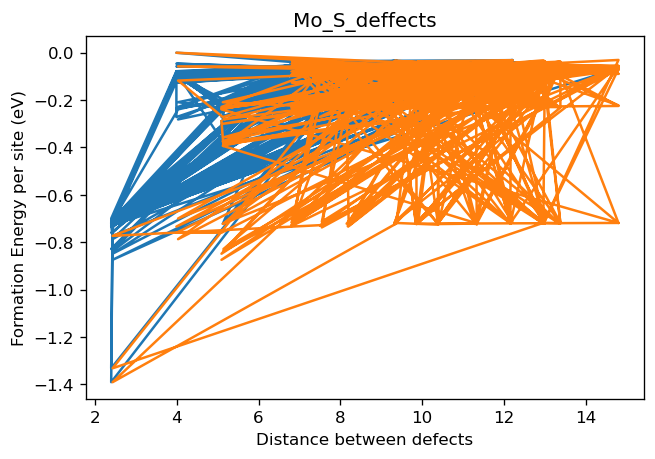

In [206]:

fig, ax = plt.subplots(dpi=120)

ax.set_ylabel('Formation Energy per site (eV)'),
ax.set_xlabel('Distance between defects')
ax.set_title('Mo_S_deffects')
plt.plot(Dataset,Dy)

In [15]:
def get_sub_trees_of_binary(list_of_tokens, idx):
    if list_of_tokens[idx] in rs_operators.OPERATORS:
        open_nodes = rs_operators.OPERATORS[list_of_tokens[idx]].arity
    else:
        open_nodes = 0
    left, right = [], []
    current_sub_tree = left
    for i, token in enumerate(list_of_tokens[idx + 1:]):
        if open_nodes == 0:
            break
        if open_nodes == 1:
            current_sub_tree = right
        current_sub_tree.append(token)

        if token in rs_operators.OPERATORS:
            operator = rs_operators.OPERATORS[token]
            open_nodes += operator.arity - 1
        else:
            open_nodes -= 1
    return left, right


def get_offsprings(list_of_tokens, idx):
    if list_of_tokens[idx] in rs_operators.OPERATORS:
        open_nodes = rs_operators.OPERATORS[list_of_tokens[idx]].arity
    else:
        open_nodes = 0
    traversal = []
    for i, token in enumerate(list_of_tokens[idx + 1:]):
        if open_nodes == 0:
            break
        traversal.append(token)
        if token in rs_operators.OPERATORS:
            operator = rs_operators.OPERATORS[token]
            open_nodes += operator.arity - 1
        else:
            open_nodes -= 1

    return traversal

def predicate(list_of_tokens, chek = False):

        
#    if list_of_tokens[0] == 'add':
 #       left, right = get_sub_trees_of_binary(list_of_tokens, 0)
  #      if right not in rs_operators or left !='div':
   #             return False

    if  'exp' not in list_of_tokens:
        return False
    if  'cos' not in list_of_tokens:
        return False    
    if 'x1'  not in list_of_tokens or 'x2' not in list_of_tokens :
        return False

#   if 'cos**2' not in list_of_tokens and 'sin**2' not in list_of_tokens and 'sin' not in list_of_tokens and 'cos' not in list_of_tokens :
#       return False
    
 #   if list_of_tokens[0] != 'OSCE':
  #      return False
    
 #   if 'OSCE' not in list_of_tokens:
  #      return False

    for i, token in enumerate(list_of_tokens):
        offsprings = get_offsprings(list_of_tokens, i)      
        if  token == 'exp'  or token == 'pow2' or token == 'sin' or token == 'pow' or token == 'cos' or token == 'OSCE':
            if  'exp' in offsprings or 'pow2' in offsprings or 'sin' in offsprings or 'pow' in offsprings or 'cos' in offsprings or 'OSCE' in offsprings or  'x1' not in offsprings  :

                return False
           
            
            
    return True


In [12]:
Dataset

array([[ 6.8145602 ,  8.15283752],
       [ 6.8145602 ,  9.8490153 ],
       [12.96483908, 13.00246713],
       ...,
       [14.80339399, 12.95855712],
       [ 5.13884247,  5.13884247],
       [ 5.09108558,  5.09108558]])

In [173]:
x_lows = [min([Dataset[var_idx][var] for var_idx in range(Dataset.shape[0])]) for var in range(Dataset[0].shape[0])]
x_lows

[2.3928588998988944, 2.426648623735218, 3.124590839999999]

In [13]:
#x_lows = [Dataset[var_idx] for var_idx in range(Dataset.shape[0])].min(axis=0)
#x_highs = [Dataset.max(axis=0)[var_idx] for var_idx in range(Dataset.shape[0])]
x_lows = [min([Dataset[var_idx][var] for var_idx in range(Dataset.shape[0])]) for var in range(Dataset[0].shape[0])]
x_highs = [max([Dataset[var_idx][var] for var_idx in range(Dataset.shape[0])]) for var in range(Dataset[0].shape[0])]

#x_lows = Dataset.min(axis=0)
#x_highs = Dataset.max(axis=0)
y_dom = (Dy.min()-1, Dy.max()+1)
#domains_grid = (x_lows, x_highs, y_dom)
domains_grid = (x_lows, x_highs, y_dom)
print(domains_grid )

([2.3928588998988944, 2.3928588998988944], [14.80339399047801, 14.80339399047801], (-2.391026606666704, 1.0))


In [ ]:
solver = run_experiment(Dataset, Dy,
        functions=['add', 'sub', 'mul', 'div','pow2','cos','pi','0.5','exp','pow'],
        #functions=list(rs_operators.OPERATORS.keys()),
        #free_variables=['x1','x2','x3','x4','x5','x6'],
        free_variables=['x1','x2'],
        wandb_proj='SEGVAE2',
        project_name='SEGVAE2_3d_sim',
        constants=[],
        float_constants=rs_operators.FLOAT_CONST + rs_operators.INT_CONST,
        #float_constants=None,
        epochs=3000,
        n_formulas_to_sample=5000,
        max_formula_length=30,
        formula_predicate=predicate,
        true_formula=rs_equation.Equation(['5']),
        latent=128,
        lstm_hidden_dim=64,
        device='cuda',
        train_size=50000,
        log_intermediate_steps=True,
        domains=domains_grid,
        simplification=False,
        pretrain_path=None)

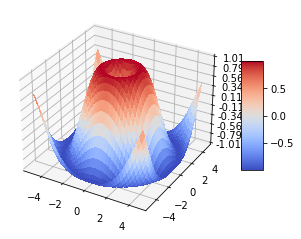

In [218]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

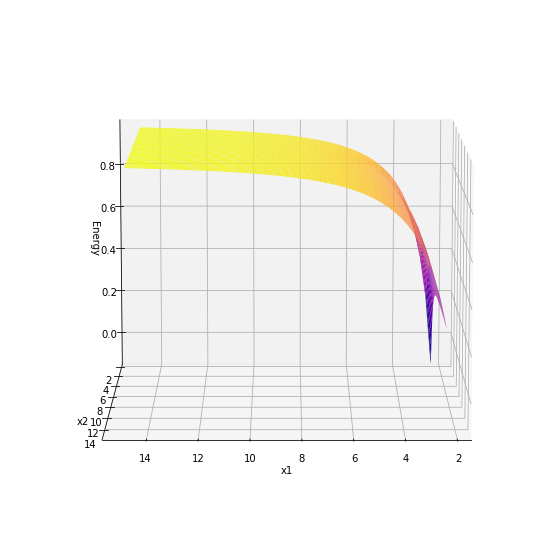

In [252]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np






pi = 3.14
#X1 = np.sort(X1)

x1= np.linspace(2.3928588998988944, 14.803393990478007)
x2= np.linspace(2.426648623735218, 14.80339399047801)

xx1, xx2 = np.meshgrid(x1, x2, sparse=True)



Energy= 1 + (4 / ((4 / (pi - ((pi / xx1) - ((xx2 - xx1)**2)))) - (xx1**2)))

#Energy = 5.0 - (np.sin(distance - 7.0)**2 + 4.0/distance)/distance
#Energy = 4.895091 + (np.cos(4) / (x1 + (np.cos(x1) + np.cos(((x1 + (4 + 7)) + x1)))))


#Energy = 4.895091 + (((x1 * (np.cos(0.5) * ((np.cos(((0.5 * (4 * (x1 * (4 - x1)))) / x1)) * x1) / x1))) - x1) / ((np.exp(x1)) / x1))

#Energy = 4.895091 +  (((np.cos((x1 + x1)) - 1) + (x1 + 1)) / ((x1 - (np.exp(x1))) / (x1 + 0.5)))

#Energy = 1 + (4 / ((4 / (pi - ((pi / x1) - ((x2 - x1)**2)))) - (x1**2)))
#Energy = 4.895091 +(np.cos(((x1 --6.585766279343152) / (x1 * x1))) - ((((-7.297645667387071 + 4) * (x1 + -0.9812733109033626)) * 0.30270047791242766) + x1))

#Energy = 5.0 - (np.cos(distance)**2 )* np.exp(-distance) /(distance**2)

#print(distance)
#plt.plot(distance, Energy)
fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(111, projection='3d')
#print(Energy)                
ax.plot_surface(xx1, xx2, Energy, cmap="plasma")

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Energy');

ax.view_init(10, 90)
plt.show()



#ax.set_ylabel('Formation Energy per site (eV)'),
#ax.set_xlabel('Distance between defects')
#ax.set_title('Mo_S_deffects')